<a href="https://colab.research.google.com/github/basangoudapatil/Project-1-WineQuality-/blob/main/Project_1(WineQuality).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import the necessary modules
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# Perform basic data engineering on the dataset
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# impute the null values with any central tendencies
for col in df.columns:
  if df[col].isnull().sum()>0:
    df[col] = df[col].fillna(df[col].median())

In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# check if all the data is in correct format
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
# Types is my target variable, as i am trying to classify based on other featue variables, encode it to proper format
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [11]:
# In the type column only two variables are present, so label encoding is appropraite
df['type'] = df['type'].map({'white': 0, 'red': 1})
df['type'].head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

In [12]:
df.head()
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.216246,0.339630,0.318718,5.443574,0.056039,30.525319,115.744574,0.994697,3.218384,0.531202,10.491801,5.818378
std,0.430779,1.295779,0.164557,0.145231,4.757585,0.035031,17.749400,56.521855,0.002999,0.160637,0.148769,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [17]:
df['quality'].value_counts().sort_index(ascending = True)

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [19]:
#Encode the values using appropriate method
df['quality1'] = [0 if i<5 else 1 for i in df.quality]
df['quality1'].value_counts()

1    6251
0     246
Name: quality1, dtype: int64

Class 0 : 246
Class 1: 6251
Proportion of count 0 : 96.21 %


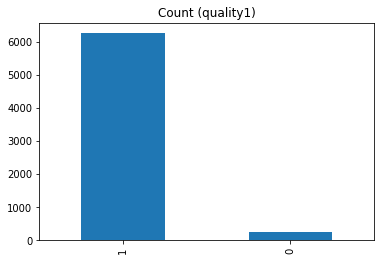

In [20]:
quality1_count = df.quality1.value_counts()
print('Class 0 :', quality1_count[0])
print('Class 1:', quality1_count[1])
print('Proportion of count 0 :', round(quality1_count[1] * 100 / (quality1_count[1] + quality1_count[0]), 2), '%')

quality1_count.plot(kind = 'bar', title = 'Count (quality1)')

Class 1 contains about 96.21% of the values, the data is imbalanced. There fore balancing is necessary.

In [21]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'quality1'],
      dtype='object')

**Prepare the data for Test and Train**

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality1','quality'], axis=1)
y = df['quality1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((4547, 12), (4547,))

In [24]:
# As the problem is an imbalanced one, Balancing the train data set is essential
import imblearn
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')

X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [28]:
X_smt.shape, y_smt.shape

((7183, 12), (7183,))

In [31]:
X_smt.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,9.8,0.25,0.74,10.0,0.056,36.0,225.0,0.9977,3.06,0.43,10.0
1,0,9.8,0.93,0.45,8.6,0.052,34.0,187.0,0.9994,3.12,0.59,10.2
2,1,8.2,0.78,0.00,2.2,0.089,13.0,26.0,0.9978,3.37,0.46,9.6


In [32]:
y_smt.head(3)

0    0
1    0
2    0
Name: quality1, dtype: int64

In [33]:
#As this is a classification probelm, performing scaling is a good practise
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_smt_scaled = scaler.fit_transform(X_smt)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_smt_scaled[0:3]

array([[-0.50313047,  2.1029624 , -0.73407606,  3.03729086,  1.2594809 ,
        -0.04344005,  0.50475073,  1.94577581,  1.15059953, -1.07062536,
        -0.68481888, -0.34275212],
       [-0.50313047,  2.1029624 ,  2.58968524,  1.07110117,  0.92400879,
        -0.17036945,  0.4039207 ,  1.30326026,  1.80418931, -0.70658233,
         0.56116482, -0.15346986],
       [ 1.98755605,  0.78687826,  1.8565026 , -1.97988283, -0.60957802,
         1.00372748, -0.6547946 , -1.41897667,  1.18904599,  0.81026364,
        -0.45119694, -0.72131663]])

**Modelling of the Task**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression()
clf2 = SVC(kernel='rbf')

In [38]:
# For logisticregression
clf1.fit(X_smt_scaled, y_smt)
y_pred = clf1.predict(X_test_scaled)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
3103,1,1
1419,1,1
4761,1,1
4690,1,1
4032,1,1


In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score
print('The accuracy of the model: ', accuracy_score(y_test, y_pred))
print('The AUROC score of the model: ', roc_auc_score(y_test, y_pred))

The accuracy of the model:  0.7174358974358974
The AUROC score of the model:  0.7139241384092643


In [40]:
# For SVC
clf2.fit(X_smt_scaled, y_smt)
y_pred = clf2.predict(X_test_scaled)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
3103,1,1
1419,1,1
4761,1,1
4690,1,1
4032,1,1


In [41]:
print('The accuracy of the model: ', accuracy_score(y_test, y_pred))
print('The AUROC score of the model: ', roc_auc_score(y_test, y_pred))

The accuracy of the model:  0.8205128205128205
The AUROC score of the model:  0.739430922497284


In [42]:
# For KNN Classifier
clf3 = KNeighborsClassifier(3)
clf3.fit(X_smt_scaled, y_smt)
y_pred = clf3.predict(X_test_scaled)

df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.head()

,Actual,Predicted
3103,1,1
1419,1,1
4761,1,1
4690,1,1
4032,1,1


In [43]:
# To find the best value of k neighbours of classification we use train score and cross-val score

from sklearn.model_selection import cross_val_score
for k in [1,2,3,4,5,6,7,8,9,10]:
  clf3 = KNeighborsClassifier(k)
  clf3.fit(X_train, y_train)
  print("K value  : " , k, " train score : ", clf3.score(X_train,y_train) , " score : ", np.mean(cross_val_score(clf3, X_train, y_train, cv=10))) #predicting using the model

K value  :  1  train score :  1.0  score :  0.9448032144067386
K value  :  2  train score :  0.9773477017813943  score :  0.9181918962095175
K value  :  3  train score :  0.9676709918627666  score :  0.9573360120056156
K value  :  4  train score :  0.9665713657356498  score :  0.9538185602943312
K value  :  5  train score :  0.9634924125797228  score :  0.9599753110325798
K value  :  6  train score :  0.964811963932263  score :  0.9584358812993174
K value  :  7  train score :  0.9632724873542995  score :  0.96063416759452
K value  :  8  train score :  0.9628326369034528  score :  0.9597531103257977
K value  :  9  train score :  0.9615130855509126  score :  0.9601936389601589
K value  :  10  train score :  0.9615130855509126  score :  0.9595333301060174


In [44]:
# From the above results K=7 and K=9 are giving the highest cross_eval score 
# therefore the model has 2 values for classification
# Finding the scores of the model with k = 5

clf3 = KNeighborsClassifier(9)
clf3.fit(X_smt_scaled, y_smt)
y_pred = clf3.predict(X_test_scaled)

print('The accuracy of the model: ', accuracy_score(y_test, y_pred))
print('The AUROC score of the model: ', roc_auc_score(y_test, y_pred))

The accuracy of the model:  0.7912820512820513
The AUROC score of the model:  0.7522016503709867


In [45]:
#K=7
clf3 = KNeighborsClassifier(7)
clf3.fit(X_smt_scaled, y_smt)
y_pred = clf3.predict(X_test_scaled)

print('The accuracy of the model: ', accuracy_score(y_test, y_pred))
print('The AUROC score of the model: ', roc_auc_score(y_test, y_pred))

The accuracy of the model:  0.8
The AUROC score of the model:  0.7497399625546078


In [46]:
# Applying Decision Tree Model to the above problem
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_smt_scaled, y_smt)
y_pred = dt.predict(X_test_scaled)
y_pred[0:5]

array([1, 1, 1, 1, 1])

In [47]:
# Checking the best value of max-depth to reduce overitting and underfitting
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(X_smt_scaled, y_smt)

  trainaccuracy = accuracy_score(y_smt, dt.predict(X_smt_scaled))

  dt = DecisionTreeClassifier(max_depth = depth)
  valAccuracy = cross_val_score(dt, X, y, cv =10)
  print('Depth: ', depth, 'Training Accuracy: ', trainaccuracy, 'Cross Val Score: ', np.mean(valAccuracy))

Depth:  1 Training Accuracy:  0.7079214812752332 Cross Val Score:  0.9621367784757616
Depth:  2 Training Accuracy:  0.7441180565223444 Cross Val Score:  0.9621370155268458
Depth:  3 Training Accuracy:  0.7949324794654045 Cross Val Score:  0.9601327486073249
Depth:  4 Training Accuracy:  0.841988027286649 Cross Val Score:  0.9579779542491407
Depth:  5 Training Accuracy:  0.8664903243770012 Cross Val Score:  0.9544356998933271
Depth:  6 Training Accuracy:  0.8958652373660031 Cross Val Score:  0.9524345146379046
Depth:  7 Training Accuracy:  0.9175831825142698 Cross Val Score:  0.948891549128837
Depth:  8 Training Accuracy:  0.927328414311569 Cross Val Score:  0.9488939196396823
Depth:  9 Training Accuracy:  0.9437560907698733 Cross Val Score:  0.9458117814389
Depth:  10 Training Accuracy:  0.9622720311847418 Cross Val Score:  0.9433495318241082


In [48]:
# From the above results depth=1 and depth=2 are giving the highest cross_eval score 
# therefore the model has 2 values for classification
# Finding the scores of the model

dt = DecisionTreeClassifier(max_depth=1)

dt.fit(X_smt_scaled, y_smt)
y_pred = dt.predict(X_test_scaled)

print('The accuracy of the model: ', accuracy_score(y_test, y_pred))
print('The AUROC score of the model: ', roc_auc_score(y_test, y_pred))

The accuracy of the model:  0.6282051282051282
The AUROC score of the model:  0.6327693410073272


In [49]:
# max_depth = 2
dt = DecisionTreeClassifier(max_depth = 2)

dt.fit(X_smt_scaled, y_smt)
y_pred = dt.predict(X_test_scaled)

print('The accuracy of the model: ', accuracy_score(y_test, y_pred))
print('The AUROC score of the model: ', roc_auc_score(y_test, y_pred))

The accuracy of the model:  0.5205128205128206
The AUROC score of the model:  0.6607146984721355


From the above results of AUROC score, it is evident that KNN is the optimum model for WINE Prediction.

**Feature Importances**

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 3)
# Fit dt to the training set
dt.fit(X_smt_scaled, y_smt)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.0, 'type'),
 (0.0, 'fixed acidity'),
 (0.0, 'volatile acidity'),
 (0.0, 'citric acid'),
 (0.06755741125660833, 'residual sugar'),
 (0.0, 'chlorides'),
 (0.5958946299856501, 'free sulfur dioxide'),
 (0.2056807619369572, 'total sulfur dioxide'),
 (0.0, 'density'),
 (0.0, 'pH'),
 (0.13086719682078438, 'sulphates'),
 (0.0, 'alcohol')]

*The Important features are:* 
1. **Free Sulfur Dioxide**
2. **Total Sulfur Dioxide**
3. **Sulphates**
4. **Residual Sugar**